In [ ]:
import pandas as pd
 
# Load the data
data = pd.read_csv('../Datasets/animal_cases.csv')


data.head()


,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source,year,animal
0,101000295622,2011-07-01 02:44:50,2011-07-04 02:44:49,2011-07-01 02:44:55,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 16,1602,305 Freeport St,2122,42.302020,-71.051911,0101000020E6100000AC4EA98052C351C098735293A826...,Employee Generated,2011,Animal
1,101000295636,2011-07-01 03:44:54,2011-07-04 03:44:53,2011-07-01 05:19:44,ONTIME,Closed,Case Closed Case Resolved Pickup Dead Animal (...,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 18,1801,10 Ledgebrook Rd,2126,42.270690,-71.083371,0101000020E61000009AEA0EF255C551C0821CA0F4A522...,Constituent Call,2011,Cats
2,101000295715,2011-07-01 04:40:53,2011-07-04 04:40:53,2011-07-01 05:18:50,ONTIME,Closed,Case Closed Case Resolved,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 2,0202,114 Sixteenth St,2129,42.379345,-71.051074,0101000020E6100000EA197ECD44C351C06EBE625C8E30...,Constituent Call,2011,Animal
3,101000295859,2011-07-01 06:51:01,2011-07-04 06:51:00,2011-07-01 06:51:08,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 15,1504,10 Hendry St,2125,42.308970,-71.064861,0101000020E61000004562F4AC26C451C0B1264B508C27...,Employee Generated,2011,Animal
4,101000295903,2011-07-01 07:46:49,2011-07-04 07:46:45,2011-07-01 09:15:33,ONTIME,Closed,Case Closed Case Resolved picked up,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 18,1813,69 Davison St,2136,42.257640,-71.117461,0101000020E6100000F91C537A84C751C0FE88B655FA20...,Employee Generated,2011,Animal


In [ ]:
import numpy as np


data['open_dt'] = pd.to_datetime(data['open_dt'])


data['month'] = data['open_dt'].dt.month


def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'


data['season'] = data['month'].apply(categorize_season)

data[['open_dt', 'month', 'season', 'case_title']].head()


,open_dt,month,season,case_title
0,2011-07-01 02:44:50,7,Summer,Pick up Dead Animal
1,2011-07-01 03:44:54,7,Summer,Pick up Dead Animal
2,2011-07-01 04:40:53,7,Summer,Pick up Dead Animal
3,2011-07-01 06:51:01,7,Summer,Pick up Dead Animal
4,2011-07-01 07:46:49,7,Summer,Pick up Dead Animal


In [ ]:
# Calculate the total number of complaints per season
seasonal_complaints = data['season'].value_counts().reset_index()
seasonal_complaints.columns = ['Season', 'Total Complaints']

# Display the total number of complaints per season
seasonal_complaints


,Season,Total Complaints
0,Summer,27477
1,Autumn,22695
2,Spring,19070
3,Winter,14039


In [ ]:

seasonal_case_types = data.groupby(['season', 'case_title']).size().reset_index(name='count')


top_seasonal_complaints = seasonal_case_types.sort_values(['season', 'count'], ascending=[True, False]).groupby('season').head(5)


top_seasonal_complaints.pivot(index='case_title', columns='season', values='count').fillna(0)


season,Autumn,Spring,Summer,Winter
case_title,,,,
Animal Found,787,779,781,673
Animal Generic Request,6645,6843,9774,4729
Animal Lost,664,584,634,526
Animal Noise Disturbances,356,324,353,240
Pick up Dead Animal,14231,10534,15932,7866


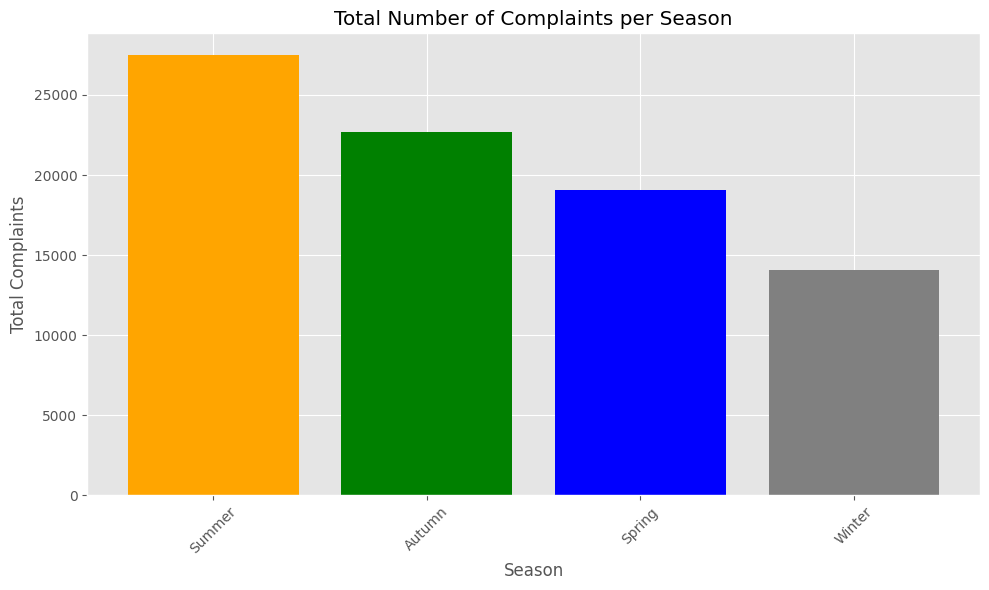

In [ ]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('ggplot')

# Create a bar plot for the total number of complaints per season
plt.figure(figsize=(10, 6))
plt.bar(seasonal_complaints['Season'], seasonal_complaints['Total Complaints'], color=['orange', 'green', 'blue', 'grey'])
plt.title('Total Number of Complaints per Season')
plt.xlabel('Season')
plt.ylabel('Total Complaints')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import numpy as np


# Convert 'open_dt' to datetime
data['open_dt'] = pd.to_datetime(data['open_dt'])

# Extract year and month from 'open_dt'
data['year'] = data['open_dt'].dt.year
data['month'] = data['open_dt'].dt.month


# Define a function to map months to seasons
def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Apply the function to create a 'season' column
data['season'] = data['month'].apply(month_to_season)
data_no_2024 = data[data['year'] != 2024]

# Aggregate data by year and season
seasonal_counts = data_no_2024.groupby(['year', 'season']).size().unstack(fill_value=0)

# For the heatmap, it's better to ensure all seasons are present even if they have zero cases
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
# Reindex the columns to make sure all seasons are present and in order
seasonal_counts = seasonal_counts.reindex(columns=seasons)

seasonal_counts.head()


season,Winter,Spring,Summer,Fall
year,,,,
2011,104,0,333,492
2012,387,493,692,596
2013,429,459,717,969
2014,665,1120,1638,1218
2015,809,1284,1851,1455


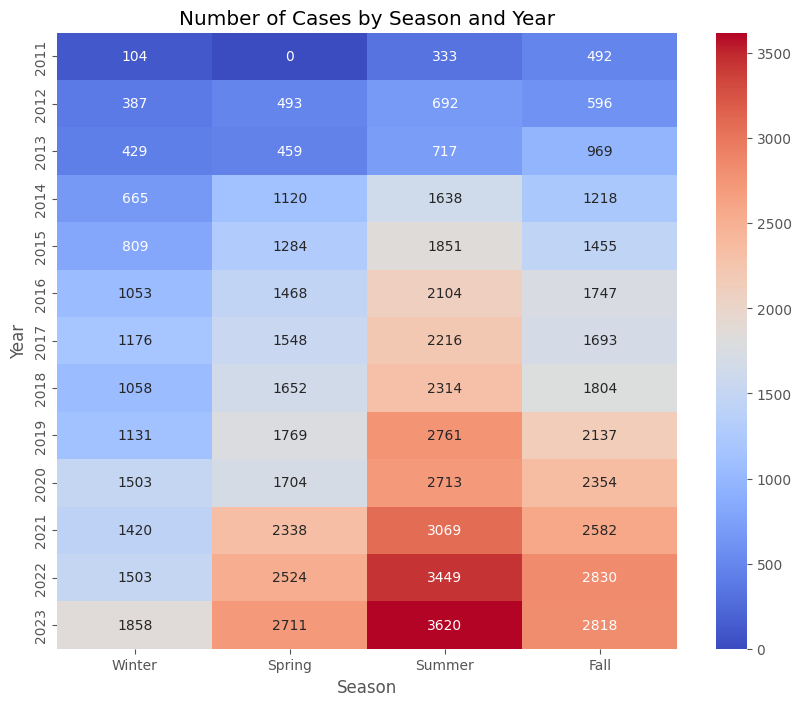

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(seasonal_counts, annot=True, cmap='coolwarm', fmt='g')

# Adding title and labels for clarity
plt.title('Number of Cases by Season and Year')
plt.xlabel('Season')
plt.ylabel('Year')

# Display the heatmap
plt.show()


In [ ]:
# Add heatmap folder if not exist
import os
if not os.path.exists('Heatmaps'):
    os.makedirs('Heatmaps')

In [ ]:

import folium
from folium.plugins import HeatMap

data_no_2024 = data[data['year'] != 2024]


seasons_data_no_2024 = {
    'winter': data_no_2024[data_no_2024['season'] == 'Winter'],
    'spring': data_no_2024[data_no_2024['season'] == 'Spring'],
    'summer': data_no_2024[data_no_2024['season'] == 'Summer'],
    'fall': data_no_2024[data_no_2024['season'] == 'Fall']
}

def generate_base_map(default_location=[42.3601, -71.0589], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map


heatmaps_paths_no_2024 = {}

for season, season_data in seasons_data_no_2024.items():

    season_heat_data = season_data[['latitude', 'longitude']].dropna().values.tolist()
    

    season_map = generate_base_map()
    
  
    HeatMap(season_heat_data).add_to(season_map)
    

    season_heatmap_path = f'./HeatMaps/boston_{season}_heatmap_no_2024.html'
    season_map.save(season_heatmap_path)
    
  
    heatmaps_paths_no_2024[season] = season_heatmap_path

heatmaps_paths_no_2024


{'winter': './HeatMaps/boston_winter_heatmap_no_2024.html',
 'spring': './HeatMaps/boston_spring_heatmap_no_2024.html',
 'summer': './HeatMaps/boston_summer_heatmap_no_2024.html',
 'fall': './HeatMaps/boston_fall_heatmap_no_2024.html'}